In [1]:
# This notebook requires py-pde in version 0.17.1 or later
# The package can be obtained from https://github.com/zwicker-group/py-pde
# Alternatively, it can be installed via pip or conda

import pde

# plotting functions
import matplotlib.pyplot as plt
import numpy as np

So far, we have looked at simple diffusion ($\nabla^2 c$), where patterns arose from non-linear reactions.

Next, we want to go beyond simple diffusion. We will see that patterns can then arise even from linear reactions.

# Physics of simple diffusion

To understand more complex cases, let us first investigate the physics of simple diffusion.
Simple diffusion is a good description of dilute solutions or ideal gases.

## Thermodynamics of ideal solutions

Let us consider $N$ particles in a volume $V$ at fixed temperature $T$.
We then know (from Statistical Mechanics):

- the free energy $F=k_\mathrm{B}T N\left[\ln\frac{N}{V} + a \right]$
- the chemical potential $\mu = \left(\frac{\partial F}{\partial N}\right)_{V,T} = k_\mathrm{B}T \ln\frac{N}{V} + \mu_0 $

Defining the concentration $c=\frac{N}{V}$, we find the simpler expression
\begin{align}
\mu = k_\mathrm{B}T \ln c + \mu_0
\end{align}

### Problem 1: Chemical potential of ideal solutions
Plot the chemical potential $\mu$ as a function of $c$. Can you interpret the qualitative functional form?

### Solution 1

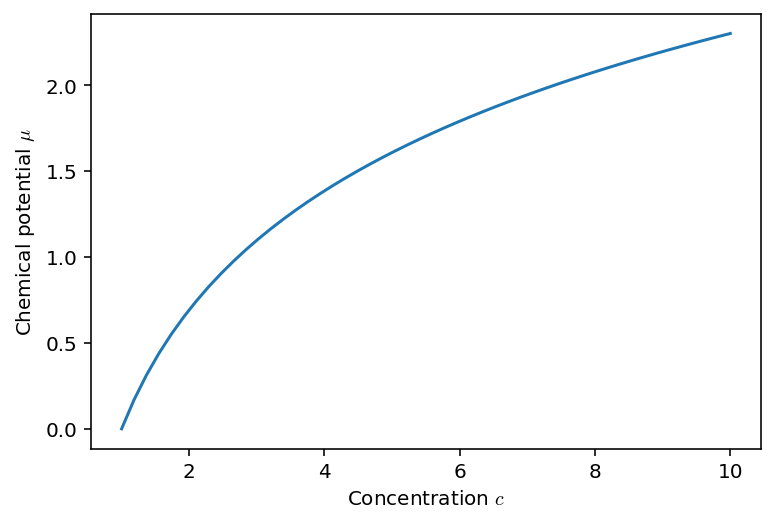

In [2]:
c = np.linspace(1, 10)
plt.plot(c, np.log(c))
plt.xlabel('Concentration $c$')
plt.ylabel(r'Chemical potential $\mu$');

### Solution 1
The chemical potential is increasing with the concentration $c$. Consequently, it is more costly to insert particles at higher densities.

## Dynamics of an inhomogeneous system
An inhomogeneous system can be described by a concentration field $c(x, y, t)$. We will demonstrate that the dynamics of such a system are given by

\begin{align}
    \partial_t c(x, y, t) = \nabla\bigl[M(c) \nabla c(x, y, t) \bigr]
\end{align}

### Problem 2: Dynamics of ideal solutions
Use the chemical potential $\mu = k_\mathrm{B}T \ln c + \mu_0$ and the mobility function $M(c) = M_0 c$ to derive the dynamics of ideal solutions

### Solution 2
You should find the simple diffusion equation, $\partial_t c = D \nabla^2 c$ with diffusivity $D=M_0 k_\mathrm{B} T$.

# Physics of non-ideal solutions
We saw that the physics of ideal solutions, which consist of non-interacting particles, leads to simple diffusion.
We next consider a simple model of non-ideal solutions, where particles will interact.

## Thermodynamics of non-ideal solutions
We start by deriving the free energy of such solutions, which comprises entropic and enthalpic contributions.

### Problem 3: Entropic contributions
Visualize the entropic contributions

\begin{align}
    F_\mathrm{S} = k_\mathrm{B} N \left[\phi\ln\phi + (1 - \phi)\ln(1-\phi)\right]
\end{align}

for $\phi \in (0, 1)$.
What can you conclude from the qualitative shape?

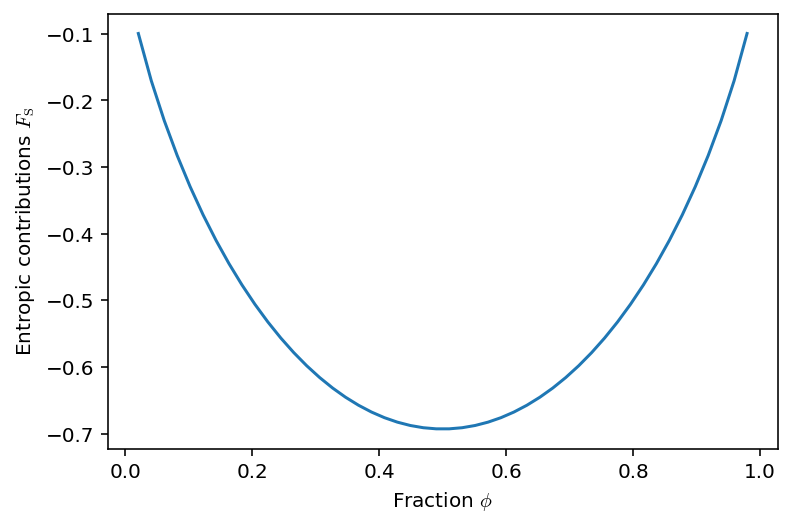

In [3]:
c = np.linspace(0, 1)[1:-1]
plt.plot(c, c * np.log(c) + (1 - c) * np.log(1 - c))
plt.xlabel('Fraction $\phi$')
plt.ylabel(r'Entropic contributions $F_\mathrm{S}$');

### Solution 3
Entropic contributions are maximal when fraction $\phi$ is very small or very large $\Rightarrow$ Entropy favors mixing

### Problem 4: Enthalpic contributions
Visualize the enthalpic contributions


\begin{align}
    F_\mathrm{I} = k_\mathrm{B} N \chi \phi (1 - \phi)
\end{align}

for $\phi \in (0, 1)$. What can you conclude from the qualitative shape?

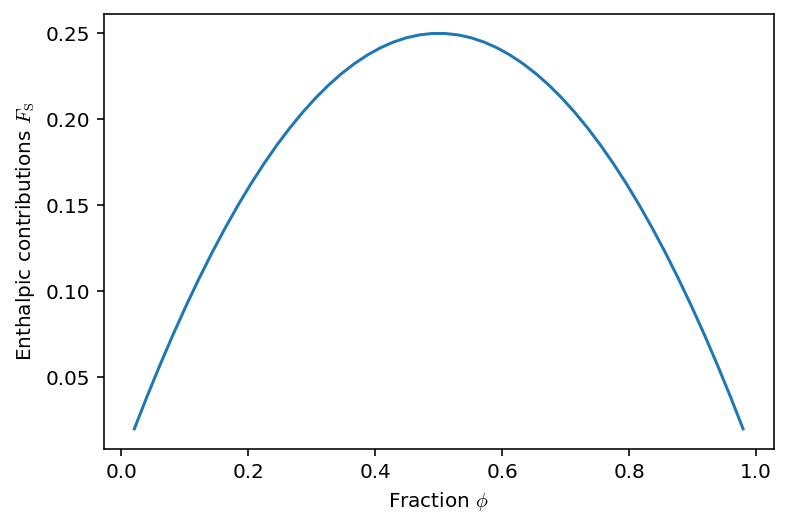

In [4]:
c = np.linspace(0, 1)[1:-1]
plt.plot(c, c * (1 - c))
plt.xlabel('Fraction $\phi$')
plt.ylabel(r'Enthalpic contributions $F_\mathrm{S}$');

### Solution 4
The enthalpic contributions are maximal when $\phi = \frac12$ $\Rightarrow$ Enthalpic favors de-mixing

### Problem 5: Total free energy
Visualize the total (Flory-Huggins) free energy 

\begin{align}
    F = k_\mathrm{B} N \left[\phi\ln\phi + (1 - \phi)\ln(1-\phi) + \chi\phi(1 - \phi)\right]
\end{align}

for $\chi = 1.5$ and $\chi = 2.5$. What do you notice?

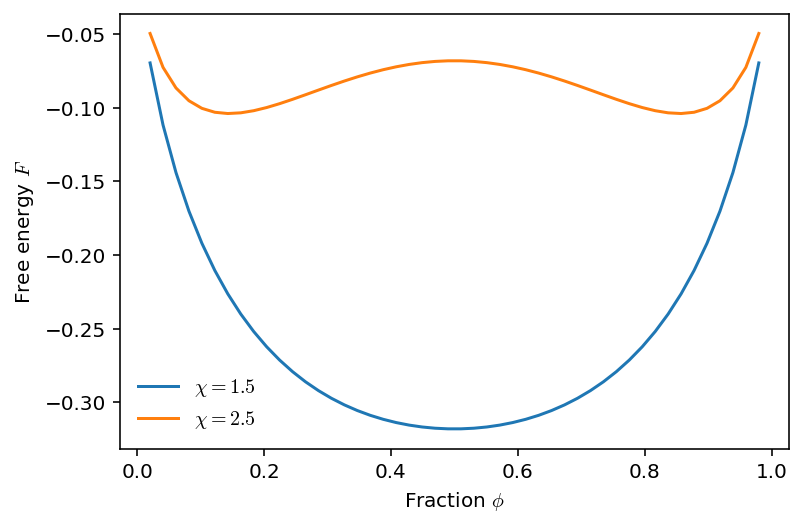

In [5]:
c = np.linspace(0, 1)[1:-1]
plt.plot(c, c * np.log(c) + (1 - c)*np.log(1 - c) + 1.5 * c * (1 - c), label='$\chi=1.5$')
plt.plot(c, c * np.log(c) + (1 - c)*np.log(1 - c) + 2.5 * c * (1 - c), label='$\chi=2.5$')
plt.xlabel('Fraction $\phi$')
plt.ylabel(r'Free energy $F$')
plt.legend();

### Solution 5
The free energy develops a local maximum at $\phi=\frac12$ for $\chi > 2$

$\Rightarrow$ There are then two values of the fraction $\phi$ with minimal f

$\Rightarrow$ The system can lower its free energy by splitting into two regions with these two compositions (Phase separation!)

## Simplified free energy of non-ideal solutions
Instead of using the Flory-Huggins free energy, we will use the simpler polynomial form

\begin{align}
    F = a V \phi^2 ( 1- \phi^2)
\end{align}

### Problem 6: Visualize the free energy
Visualize the free energy for $\phi\in[-0.1,1.1]$. What are qualitatively important features of this free energy?

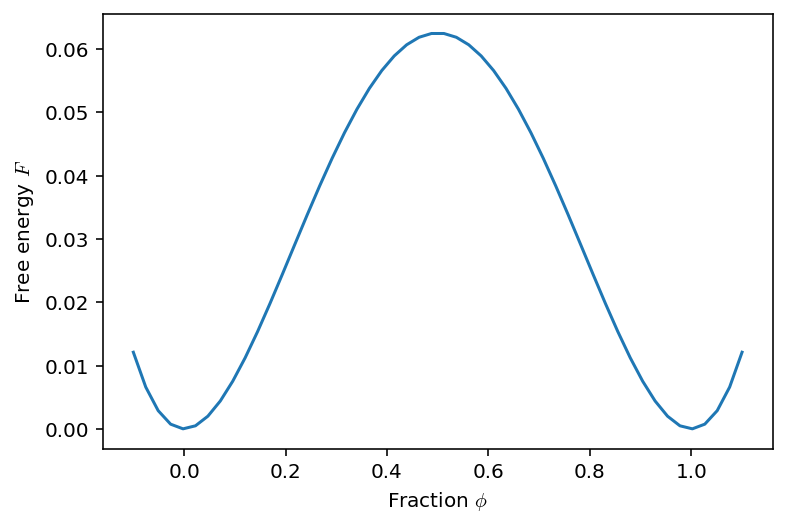

In [6]:
c = np.linspace(-0.1, 1.1)
plt.plot(c, c**2 * (1 - c)**2)
plt.xlabel('Fraction $\phi$')
plt.ylabel(r'Free energy $F$');

### Solution 6
The free energy has two minima (at $\phi=0,1$) and looks qualitatively similar to the Flory-Huggins free energy in the phase separating regime.

### Problem 7: Derive the chemical potential of this free energy

Derive the chemical potential, which is given by $\mu \propto \partial F/\partial \phi$.

Plot the resulting function. What do you notice?

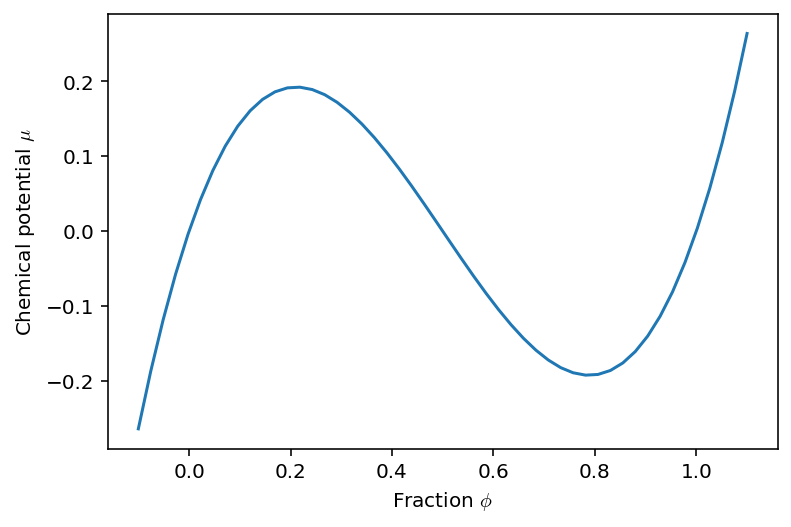

In [7]:
plt.plot(c, 2 * c * (1 - c) * (1 - 2*c))
plt.xlabel('Fraction $\phi$')
plt.ylabel(r'Chemical potential $\mu$');

### Solution 7
\begin{align}
    \mu \propto 2 \phi (1 - \phi) (1 - 2 \phi)
\end{align}

The chemical potential is non-monotonic $\Rightarrow$ Different compositions can have the same chemical potential. In particular, the fractions $\phi=0$ and $\phi=1$ both have vanishing chemical potential. Remember that two regions with equal chemical potential are in thermodynamic equilibrium!

## Naive dynamics of non-ideal solutions
To obtain the dynamics of non-ideal solutions, we next combine the generalized diffusion equation with the chemical potential of a non-ideal solution.

### Problem 8: Naive dynamics of non-ideal solutions
Simulate the dynamics of the non-ideal solution using `py-pde`.
Start with a random initial condition and observe the behavior over time.

What do you observe in the dynamics and the final state?

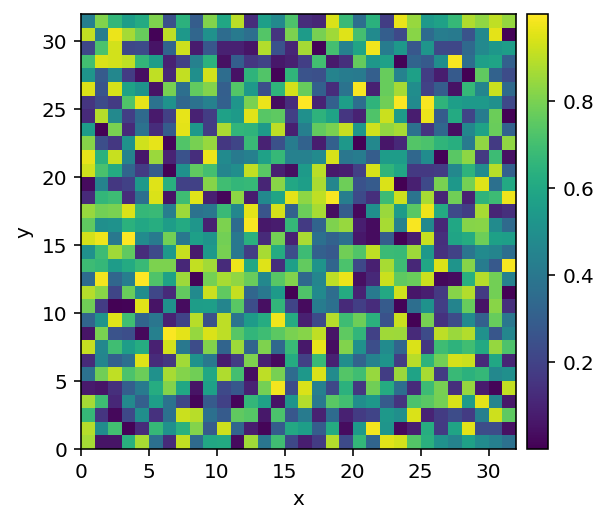

In [8]:
# prepare a random initial state
grid = pde.UnitGrid([32, 32], periodic=True)
initial_state = pde.ScalarField.random_uniform(grid, vmin=0, vmax=1)
initial_state.plot();

In [9]:
# define the partial differential equation
eq = pde.PDE({'c': 'laplace(c * (1 - c) * (1 - 2*c))'})
eq.expressions

{'c': 'laplace(c*(c - 1)*(2*c - 1))'}

  0%|          | 0/1000.0 [00:00<?, ?it/s]

Output()

/Users/dzwicker/user/miniconda3/envs/python3/lib/python3.9/site-packages/numba/core/dispatcher.py:289: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'VersionConflict((scipy 1.7.3 (/Users/dzwicker/user/miniconda3/envs/python3/lib/python3.9/site-packages), Requirement.parse('scipy<=1.6.2,>=0.16')))'.
  entrypoints.init_all()


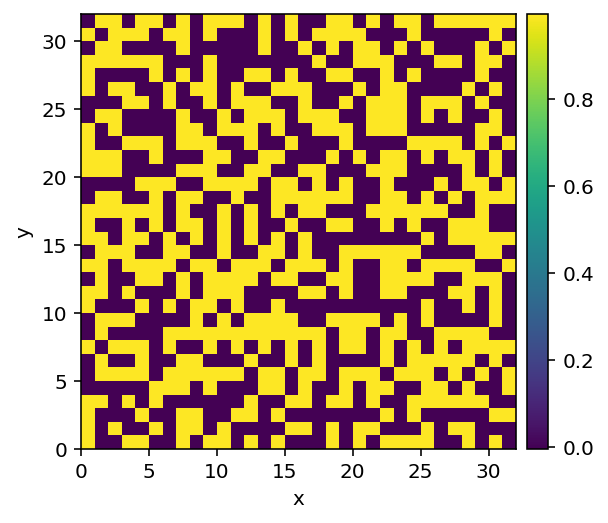

In [10]:
# simulate the dynamics
final_state = eq.solve(initial_state, t_range=1000, tracker=['progress', 'plot'])
final_state.plot();

### Solution 8
Each cell in the simulation attains a concentration of either $0$ or $1$ – this is phase separation!

However, no large scale structures are visible and certainly no droplets form.

## The gradient term
It turns out that our naive approach above neglects an important physics process, namely that it is energetically costly to have two regions of very different composition next to each other. Formally, this can be included in our description by adding a term $\frac{\kappa}{2} |\nabla c|^2$ to the free energy, which needs to be integrated over the entire volume. However, since analyzing this term would require functional analysis, we here simply use its consequence, which is to modify the chemical potential like so,

\begin{align}
    \mu \propto \phi (1 - \phi) (1 - 2 \phi) - \kappa \nabla^2 c
\end{align}

### Problem 9: Improved dynamics of non-ideal solutions
Simulate the dynamics of the non-ideal solution using the improved chemical potential with $\kappa=1$.
Start with a random initial condition and observe the behavior over time.

What do you observe in the dynamics and the final state?

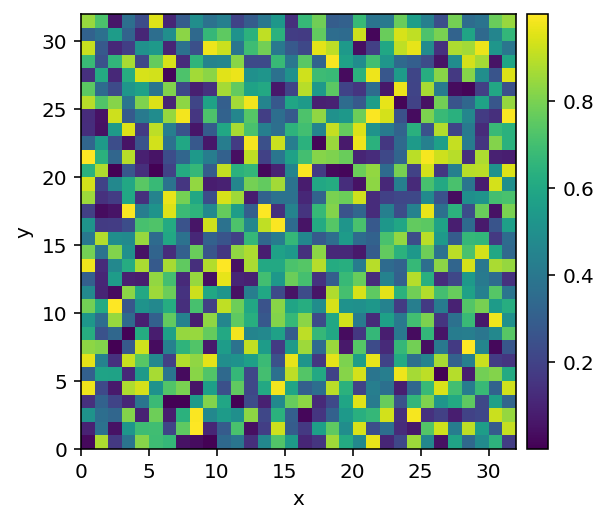

In [11]:
# prepare a random initial state
grid = pde.UnitGrid([32, 32], periodic=True)
initial_state = pde.ScalarField.random_uniform(grid, vmin=0, vmax=1)
initial_state.plot();

In [12]:
# define the partial differential equation
eq = pde.PDE({'c': 'laplace(2 * c * (1 - c) * (1 - 2*c) - laplace(c))'})
eq.expressions

{'c': 'laplace(2*c*(c - 1)*(2*c - 1) - laplace(c))'}

  0%|          | 0/1000.0 [00:00<?, ?it/s]

Output()

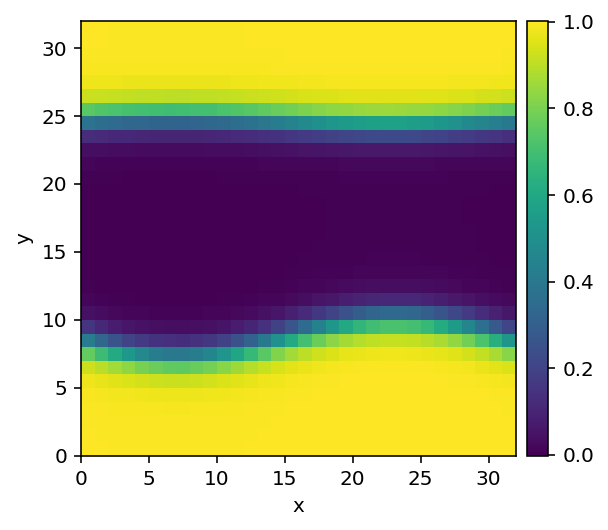

In [13]:
# simulate the dynamics
final_state = eq.solve(initial_state, t_range=1000, tracker=['progress', 'plot']);
final_state.plot();

### Solution 9
We now have proper phase separation, although the structures still look a bit funny

### Problem 10
Re-run the simulation with a initial condition where particles $A$ occupy $25\%$ and particles B occupy $75\%$ of the system.

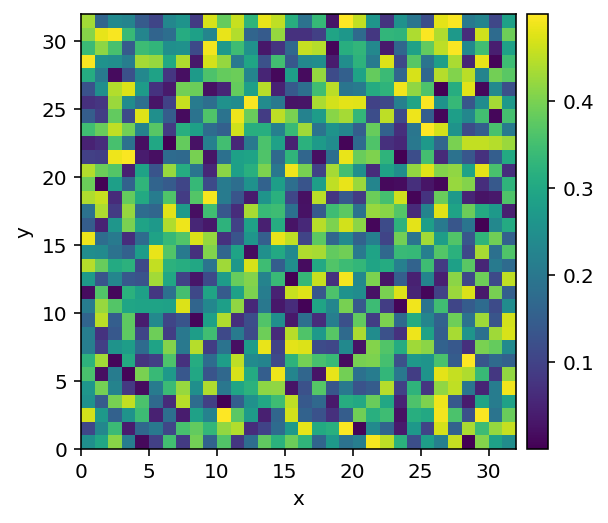

In [14]:
# prepare a random initial state
initial_state = pde.ScalarField.random_uniform(grid, vmin=0, vmax=0.5)
initial_state.plot();

  0%|          | 0/1000.0 [00:00<?, ?it/s]

Output()

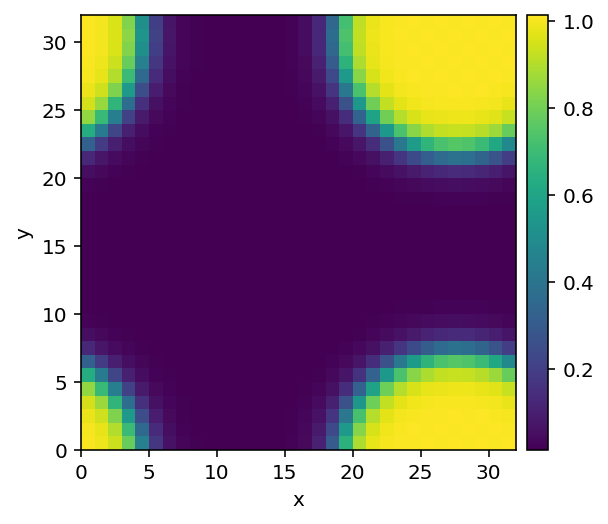

In [15]:
# simulate the dynamics
final_state = eq.solve(initial_state, t_range=1000, tracker=['progress', 'plot']);
final_state.plot();

### Solution 10
We finally have formed proper droplets!

## Ostwald ripening
Phase separating systems have a very stereo-typical dynamics, which is known as Ostwald ripening. To demonstrate this, we next consider a slightly larger system.

### Problem 11
Run the simulation shown below (using the same equation as the last problem). The code below produces a plot of the magnitude as a function of time and a movie of the time evolution.

- What do you expect the first plot to look like?
- What do you observe in the dynamics of the droplets?
- What could be a physical reason for the observed dynamics?

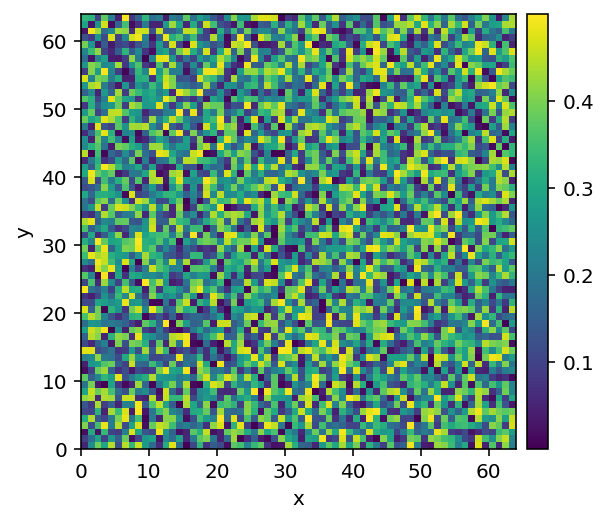

In [16]:
grid = pde.UnitGrid([64, 64], periodic=True)

# prepare a random initial state
initial_state = pde.ScalarField.random_uniform(grid, vmin=0, vmax=0.5)
initial_state.plot();

In [22]:
# simulate the dynamics once and store it, so we don't have to run the long simulation twice.
storage = pde.MemoryStorage()  # intialize a storage to save intermediate data
eq.solve(initial_state, t_range=1e4, tracker=['progress', 'plot', storage.tracker(10)]);

  0%|          | 0/10000.0 [00:00<?, ?it/s]

Output()

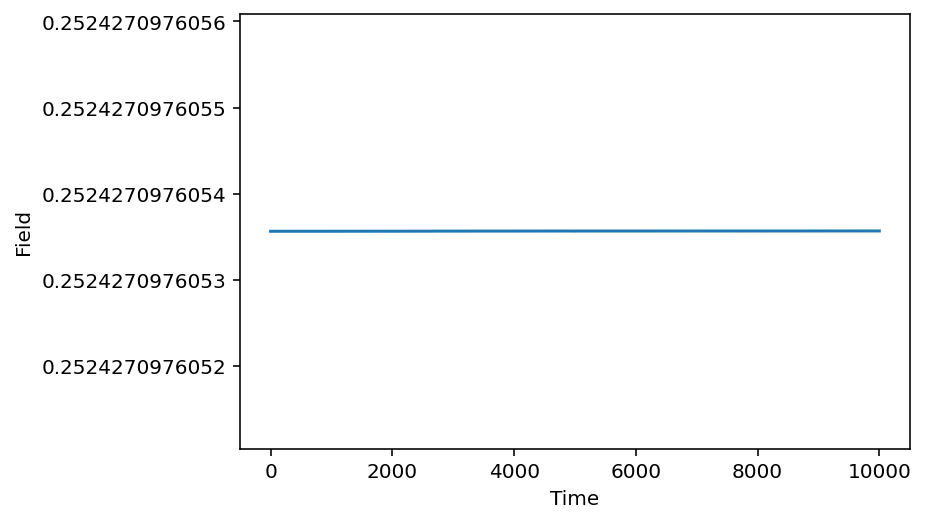

In [25]:
# Plot the average fraction as a function of time
pde.plot_magnitudes(storage)

  0%|          | 0/1001 [00:00<?, ?it/s]

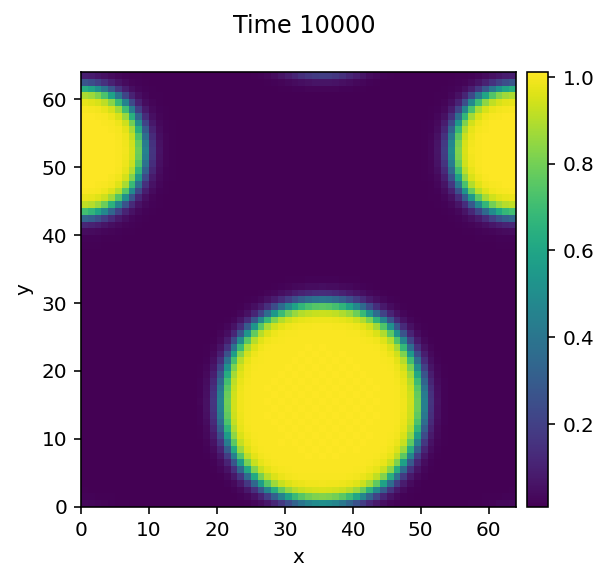

In [23]:
# make a movie of the evolution
pde.movie(storage, 'ostwald_ripening.mp4', progress=True)

### Solution 11
- The plot shows that the total amount of material is conserved. This is because particles can only exchange positions, but not be created or destroyed. This will no longer hold once we introduced chemical reactions!
- The video shows many droplets emerging at the beginning, but over time only large droplets grow, while small ones shrink. This coarsening process is called *Ostwald Ripening*.
- Ostwald ripening is driven by surface tension. Surface tension originates from the gradient term proportional to $\kappa$, which we introduced in section 2.4. In essence, this term penalizes strong gradients, which exist precisely at the interface. To minimize this energy penalty, the system evolves toward a single droplet. This is the configuration with minimal surface area (for a given volume).